In [1]:
import pandas as pd

# Regression for Italki position

In [2]:
italki = pd.read_csv('../../data/model_ranking/italki.csv', index_col=0)

In [3]:
italki.head()

,num_languages,speaks_english,gender_tuned,income_level,num_teaches,number_sessions,rating,price,is_pro,position,first_letter
0,1,1,0,-0.84154,1,10,5.0,-0.957834,0,2,0.96
1,3,1,1,-0.84154,1,2,5.0,-0.539094,0,3,0.00
2,1,0,1,-0.84154,1,3,5.0,-0.678674,0,4,0.48
3,3,1,0,-0.84154,1,5,5.0,-0.539094,1,5,0.52
4,1,1,1,-0.84154,1,1135,5.0,-0.818254,0,6,0.36


In [11]:
italki.shape

(4757, 11)

In [6]:
italki = italki.dropna()

In [7]:
italki = italki[['num_languages', 'speaks_english', 'gender_tuned', 'income_level', 'num_teaches', 'number_sessions', 'rating', 'price', 'is_pro', 'position', 'first_letter']]
X = italki[['num_languages','speaks_english', 'gender_tuned', 'income_level', 'num_teaches', 'number_sessions', 'rating', 'is_pro', 'price', 'first_letter']].values
y = italki['position'].values

In [8]:
import matplotlib.pyplot as plt

italki.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,num_languages,speaks_english,gender_tuned,income_level,num_teaches,number_sessions,rating,price,is_pro,position,first_letter
num_languages,1.00,0.09,-0.08,0.13,-0.05,0.05,-0.00,0.14,0.01,-0.01,-0.02
speaks_english,0.09,1.00,0.01,-0.01,0.04,0.03,0.02,0.02,0.00,0.01,-0.00
gender_tuned,-0.08,0.01,1.00,-0.06,-0.08,-0.00,-0.00,0.04,0.08,0.07,0.02
income_level,0.13,-0.01,-0.06,1.00,-0.20,0.07,-0.04,0.47,0.05,0.12,-0.01
num_teaches,-0.05,0.04,-0.08,-0.20,1.00,0.08,0.06,-0.03,0.07,0.03,-0.02
number_sessions,0.05,0.03,-0.00,0.07,0.08,1.00,0.07,0.19,0.23,0.07,-0.01
rating,-0.00,0.02,-0.00,-0.04,0.06,0.07,1.00,-0.01,0.02,0.02,-0.01
price,0.14,0.02,0.04,0.47,-0.03,0.19,-0.01,1.00,0.39,0.06,0.01
is_pro,0.01,0.00,0.08,0.05,0.07,0.23,0.02,0.39,1.00,0.07,-0.00
position,-0.01,0.01,0.07,0.12,0.03,0.07,0.02,0.06,0.07,1.00,-0.00


In [9]:
X

array([[ 1.        ,  1.        ,  0.        , ...,  0.        ,
        -0.95783387,  0.96      ],
       [ 3.        ,  1.        ,  1.        , ...,  0.        ,
        -0.53909403,  0.        ],
       [ 1.        ,  0.        ,  1.        , ...,  0.        ,
        -0.67867398,  0.48      ],
       ...,
       [ 1.        ,  1.        ,  1.        , ...,  0.        ,
        -1.1672038 ,  0.2       ],
       [ 1.        ,  1.        ,  1.        , ...,  0.        ,
        -1.23699377,  0.        ],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         0.01922577,  0.68      ]])

In [10]:
y

array([  2,   3,   4, ..., 100, 116, 117])

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(X_train, y_train)

In [141]:
import seaborn as sns
def plot_regression(y_test, y_pred):
    plot_df = pd.DataFrame()
    plot_df['y_true'] = y_test
    plot_df['y_pred'] = y_pred
    sns.lmplot(x='y_true',y='y_pred', data=plot_df, fit_reg=True)

In [142]:
y_hat = lin_reg.predict(X_test)

In [143]:
y_hat[:3]

array([175.27673202, 184.47526681, 146.54448423])

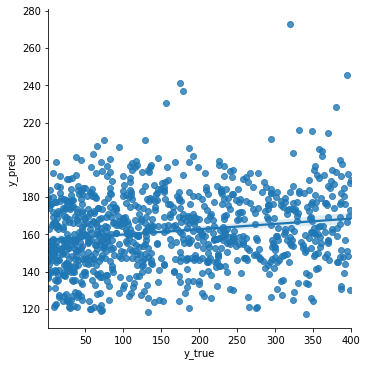

In [144]:
plot_regression(y_test, y_hat)

In [145]:
from sklearn.metrics import r2_score

r2_score(y_test, y_hat)

0.02690811126705095

In [146]:
# XGBoost Regressor

In [147]:
import xgboost

In [148]:
xgb = xgboost.XGBRegressor(learning_rate=0.1,
                 max_depth=5,
                 n_estimators=150)

In [149]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [150]:
y_hat = xgb.predict(X_test)

In [151]:
y_hat[:3]

array([ 84.345184, 168.6951  , 100.238716], dtype=float32)

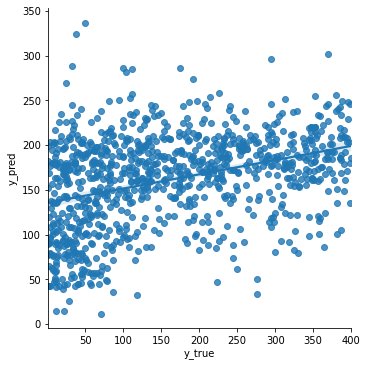

In [152]:
plot_regression(y_test, y_hat)

In [153]:
from sklearn.metrics import r2_score

r2_score(y_test, y_hat)

0.1190194901216769